Below you will find a list of tasks for this project. Note that the tasks described here are more high-level and less specific than those you were given in the first project. The goal is to provide you with more freedom to implement the analysis in ways in which you best see fit and also explore the questions which most interest you. Of course, there will be more than one solution to achieving each of these tasks. Your overall grade will depend not only on the completion of the tasks but also on your ability to demonstrate the following competencies through your code and analysis:\n",
   
# Introduction: Importing and cleaning the data"
 
You will start by downloading the data from the Kaggle link provided and import it into pandas. You will then need to clean this data using the tools and methods covered in this course. There is not just one correct way to do this. Several solutions will be accepted as long as you demonstrate that you have sufficiently cleaned the data. This includes, of course, dealing with missing values, standardising entries and text data, bringing text or time entries in a common format, dealing with duplicates or incorrect values or getting certain data in more useful formats."


  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('C:/Users/Nesserine/Desktop/EPFL/en.openfoodfacts.org.products.tsv', sep="\t", low_memory=False)
df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


In [3]:
df.shape

(356027, 163)

I want to know better the columns of the Dataframe...

In [4]:
for idx,column in enumerate(df.columns):
    print(idx,column)

0 code
1 url
2 creator
3 created_t
4 created_datetime
5 last_modified_t
6 last_modified_datetime
7 product_name
8 generic_name
9 quantity
10 packaging
11 packaging_tags
12 brands
13 brands_tags
14 categories
15 categories_tags
16 categories_en
17 origins
18 origins_tags
19 manufacturing_places
20 manufacturing_places_tags
21 labels
22 labels_tags
23 labels_en
24 emb_codes
25 emb_codes_tags
26 first_packaging_code_geo
27 cities
28 cities_tags
29 purchase_places
30 stores
31 countries
32 countries_tags
33 countries_en
34 ingredients_text
35 allergens
36 allergens_en
37 traces
38 traces_tags
39 traces_en
40 serving_size
41 no_nutriments
42 additives_n
43 additives
44 additives_tags
45 additives_en
46 ingredients_from_palm_oil_n
47 ingredients_from_palm_oil
48 ingredients_from_palm_oil_tags
49 ingredients_that_may_be_from_palm_oil_n
50 ingredients_that_may_be_from_palm_oil
51 ingredients_that_may_be_from_palm_oil_tags
52 nutrition_grade_uk
53 nutrition_grade_fr
54 pnns_groups_1
55 pnns_gro

In [5]:
mycolumns=['categories','carbohydrates_100g','fat_100g','proteins_100g']
(df[mycolumns].head(4))

,categories,carbohydrates_100g,fat_100g,proteins_100g
0,NaN,NaN,NaN,NaN
1,NaN,64.29,28.57,3.57
2,NaN,60.71,17.86,17.86
3,NaN,17.86,57.14,17.86


# A. Data import and high level exploration

First, you will download the data and do some exploratory data analysis (EDA)

Download: Get the data from the Kaggle link provided and import it into Pandas. The dataset should include 356'027 samples and 163 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [7]:
df.shape

(356027, 163)

Exploratory data analysis: The goal at this stage is to get familiar with the data and create an overview of it using Python code. Keep in mind that the table has 163 columns which means that you will need to search for the interesting columns and focus on exploring them. There are many strategies to handle this part and several solutions will be accepted, but here are some ideas to help find interesting columns and explore their content:

Using .isnull to have a top down picture of my data....

Focus for columns for example :

In [8]:
df.isnull().head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


##  What is the proportion of missing values per column/rows? Should you keep, fill or remove these missing values? What would be the implications?"

## Proportion/count missing values for each columns,  4 METHODS"
 
To cover all missing values and round the results we use this request:

In [9]:
result1=((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)
result1

code                         0.01
url                          0.01
creator                      0.00
created_t                    0.00
created_datetime             0.00
                            ...  
carbon-footprint_100g       99.92
nutrition-score-fr_100g     28.42
nutrition-score-uk_100g     28.42
glycemic-index_100g        100.00
water-hardness_100g        100.00
Length: 163, dtype: float64

In [10]:
list(result1.sort_values(ascending=False).head(115))

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.98,
 99.98,
 99.98,
 99.97,
 99.97,
 99.97,
 99.96,
 99.95,
 99.94,
 99.94,
 99.94,
 99.92,
 99.92,
 99.92,
 99.92,
 99.91,
 99.89,
 99.87,
 99.76,
 99.74,
 99.74,
 99.67,
 99.61,
 99.59,
 99.54,
 99.4,
 99.28,
 99.14,
 99.09,
 98.89,
 98.71,
 98.5,
 98.49,
 98.33,
 98.2,
 98.15,
 98.06,
 97.98,
 96.93,
 96.83,
 96.68,
 95.98,
 94.14,
 93.68,
 93.53,
 93.52,
 93.02,
 92.97,
 92.96,
 92.02,
 92.02,
 92.02,
 90.88,
 90.87,
 89.56,
 88.2,
 88.2,
 83.79,
 83.79,
 83.4,
 83.38,
 83.37,
 81.3,
 78.73,
 78.73,
 74.73,
 74.73,
 71.0,
 71.0]

In [11]:
result1.sort_values(ascending=False).head(113)#we try to keep only columns with less than 75% of the values

water-hardness_100g          100.00
ingredients_from_palm_oil    100.00
nucleotides_100g             100.00
serum-proteins_100g          100.00
nutrition_grade_uk           100.00
                              ...  
purchase_places               81.30
image_small_url               78.73
image_url                     78.73
packaging_tags                74.73
packaging                     74.73
Length: 113, dtype: float64

Testing the distribution of the largest values.

In [12]:
result1.nlargest(100)

no_nutriments                            100.00
ingredients_from_palm_oil                100.00
ingredients_that_may_be_from_palm_oil    100.00
nutrition_grade_uk                       100.00
-butyric-acid_100g                       100.00
                                          ...  
traces                                    92.02
traces_tags                               92.02
traces_en                                 92.02
emb_codes_tags                            90.88
emb_codes                                 90.87
Length: 100, dtype: float64

The list of the columns which have the largest values.Thanks to this request we can create a new data frame with only columns with less than 75% missing values..

## You're handling of the missing values is well done. However, before looking at individual samples/entries and deciding on if you want to keep, fill or remove them, I would suggest to also decide on the features/columns themselves. Does it make sense to keep something like -butyric-acid_100g that has 100% of missing values. Or even packaging with 75% missing values?

I am looking for columns with >75% of missing values.

In [13]:
result1.nlargest(113).index
columns_missing_values=list(result1.nlargest(113).index)
columns_missing_values

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 '-arachidonic-acid_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g',
 'cities',
 'allergens_en',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-glucose_100g',
 '-fructose_100g',
 'casein_100g',
 'beta-carotene_100g',
 'chromium_100g'

The aim is to see columns with >75% missing values

The aim is to create a dataframe without missing values.

In [14]:
#df_no_missing_values=df.drop(columns_missing_values,1,inplace=True)
#df_no_missing_values.head(5)

In [15]:
#df_no_missing_values.shape # the final shape of the dataframe is 50 columns..

In [16]:
RS1=result1.nsmallest(20)
RSS1=list(RS1.index)
RSS1

['creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'code',
 'url',
 'states',
 'states_tags',
 'states_en',
 'countries',
 'countries_tags',
 'countries_en',
 'product_name',
 'brands',
 'brands_tags',
 'energy_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

Testing all columns with proportion of missing values>50%

In [17]:
result1.where(result1>50).describe()

count    129.000000
mean      92.733566
std       12.584051
min       52.200000
25%       92.020000
50%       99.760000
75%       99.990000
max      100.000000
dtype: float64

### Focus number missing values for each column
To cover all missing values and round the results we can us this request:

In [18]:
#for (index,colname) in enumerate(df):
 #   print(index,"Nan in column",colname,":", df[colname].isnull().sum())

### Focus Proportion missing values for each column

To cover all missing values and round the results we can us this request:

In [19]:
#for (index,colname) in enumerate(df):
    #   print(index,"Nan in column",colname,":", df[colname].isnull().sum()*100/len(df))

## Proportion/count missing values for rows..

### Focus of the number of missing values for each row

In [20]:
#for i in range(len(df.index)) :
     #   print("Nan in row ", i , " : " ,  (df.iloc[i].isnull().sum()))

   
### Focus for proportion of missing values for each row

I do the same step than for the columns...

In [21]:
#for i in range(len(df.index)) :
     # print("Nan in row ", i , " : " ,  (df.iloc[i].isnull().sum()*100/len(df.columns)).round(2))

In [22]:
#result2=((df.isnull() | df.isna()).sum(axis=1) * 100 / len(df.columns)).round(2)
#result2

## Connecting to the previous point, and adding to my investigation - what you could also do is for example plot the amount of missing values per feature. As a suggestion, with something like this:

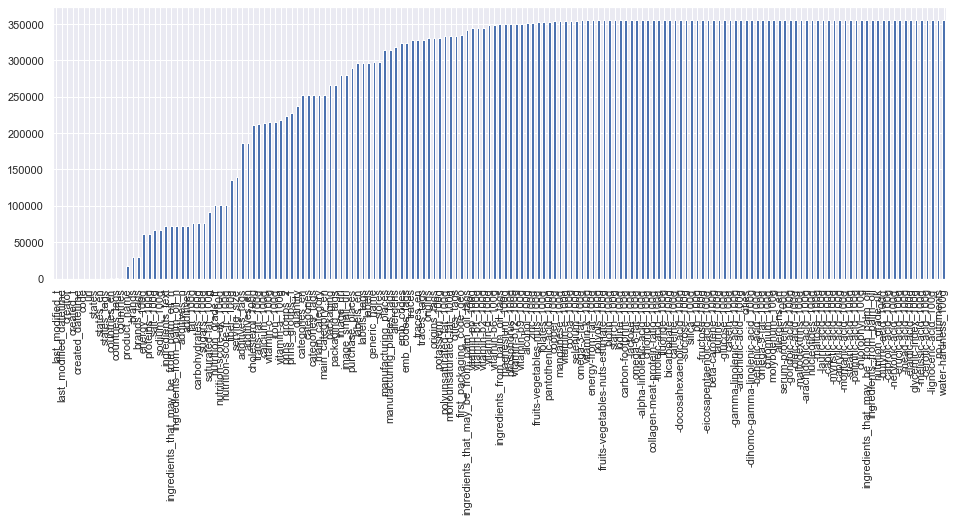

In [23]:
df.isnull().sum(axis=0).sort_values().plot(kind='bar', figsize=(16, 5));

## Based on this graph, what about dropping features with a lot of missing values? For example, using df.dropna(axis=1, thresh=...) - there's not really a clear right or wrong here. So, here I chosse to hold at least 66% of values.

In [24]:
df.dropna(axis=1, thresh=109).head(5)# here we try with a threshol of 66%
print(df.dropna(axis=1,thresh=109).shape)

(356027, 111)


In [25]:
#df=df.dropna(axis=1, thresh=109).head(5)
#df.shape

In [26]:
#df=df.dropna(axis=1, thresh=df.shape[0]*0.2)
#df.shape

Concretely if we try the above percentages clearly the dataframe will be less interesting.

### Should you keep, fill or remove these missing values? What would be the implications?

Preparing dataframe with only positif values or less than 100g for some of them.The idea is to compare step by step the size of the dataframe by implement several conditions.

In [27]:
print(df.shape)

(356027, 163)


In [28]:
columns_100g=df.columns[df.columns.str.contains('_100g')==True].tolist()
columns_100g

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructos

In [29]:
columns_100g.remove('nutrition-score-fr_100g')
columns_100g.remove('nutrition-score-uk_100g') 

In [30]:
df_columns_100g=df[columns_100g]

In [31]:
df_columns_100g=df_columns_100g[(df_columns_100g>0)].fillna(value=0 )
df_columns_100g


,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,glycemic-index_100g,water-hardness_100g
0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2243.0,0.0,28.57,28.57,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1941.0,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2540.0,0.0,57.14,5.36,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1552.0,0.0,1.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356023,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356024,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356025,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_columns_100g=df_columns_100g[(df_columns_100g<100)].fillna(value=0)
df_columns_100g

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,glycemic-index_100g,water-hardness_100g
0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,28.57,28.57,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,57.14,5.36,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356023,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356024,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356025,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

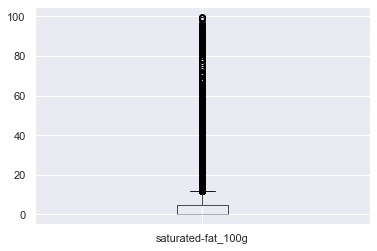

In [33]:
df_columns_100g.boxplot(column=['saturated-fat_100g'])

<AxesSubplot:>

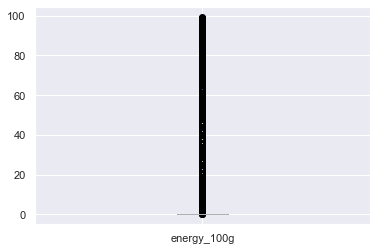

In [34]:
df_columns_100g.boxplot(column=['energy_100g'])

In [35]:
df.fillna(value =0, inplace=True)
df.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,0,1kg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I drop every Nan/outliers data and at the end I found 73736 for the shape. So we lose more than 80% of the data set values. So we can't drop every outliers/Nan errors. Hence, I decided to replace the missing data by 0. Here replacing by the mean or another statistics is irrelevent because outliers values impact too much the sample.
  

One additional visual inspection  I use is a slight adaptation from your line plots. It's something like this:

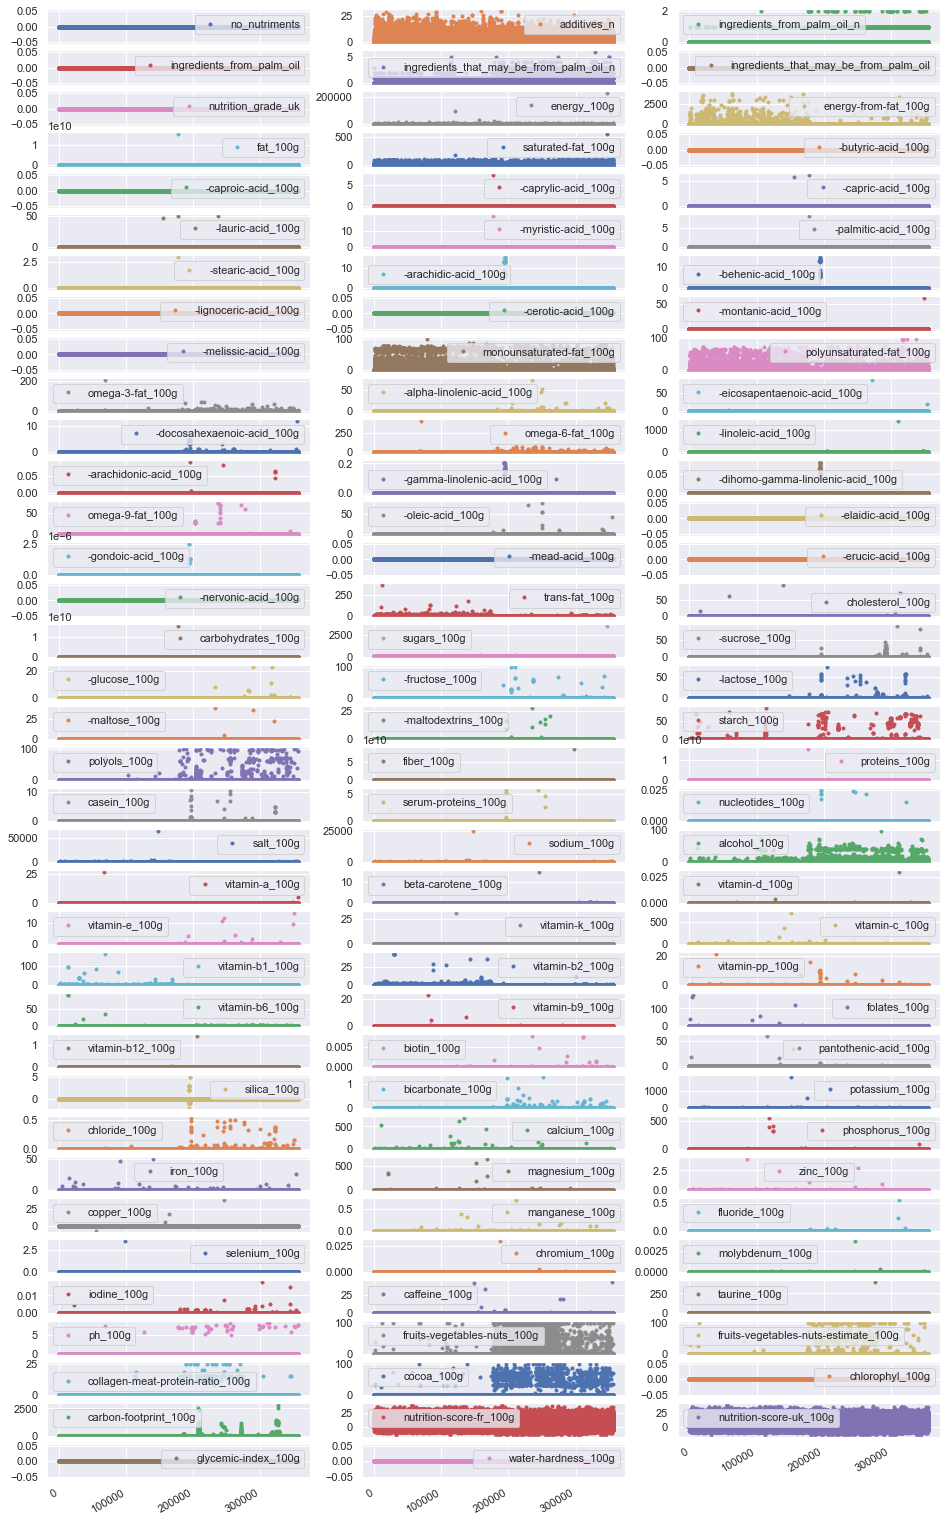

In [36]:
df.dropna(axis=1, thresh=df.shape[0]*0.2, inplace=True)
df.plot(lw=0, marker='.', subplots=True, layout=(-1, 3), figsize=(16, 30));

Looking at the figures from the previous code snippet. Are there any other outliers still remaining in your dataset?

Yes we have.

## What are the different columns data types?

We can use simply request datframe.dtypes...

In [37]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 163, dtype: object

## What are the mean/min/max/median values of numerical columns? Do you spot any issue from analyzing those statistics? ex. a negative amount of sugar, a maximum value extremely far from the 75% percentile (outlier?)"
   

The aim for this question is to select only integer or float columns.

In [38]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric=df.select_dtypes(include=numerics)
numeric.columns

Index(['no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       'energy_100g', 'energy-from-fat_100g', 'fat_100g',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=107)

In [39]:
numeric.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,356027.0,356027.000000,356027.000000,356027.0,356027.000000,356027.0,356027.0,356027.000000,356027.000000,3.560270e+05,...,356027.000000,356027.000000,356027.000000,356027.000000,356027.0,356027.000000,356027.000000,356027.000000,356027.0,356027.0
mean,0.0,1.496448,0.018681,0.0,0.047628,0.0,0.0,933.698205,1.433294,4.401420e+04,...,0.302762,0.068493,0.007853,0.202395,0.0,0.262199,6.561427,6.428653,0.0,0.0
std,0.0,2.357237,0.137026,0.0,0.251756,0.0,0.0,952.444890,45.605997,2.625640e+07,...,4.453469,2.258064,0.357098,3.451068,0.0,15.078104,8.664376,8.738437,0.0,0.0
min,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-15.000000,-15.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,146.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,787.000000,0.000000,1.700000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,2.000000,0.0,0.0
75%,0.0,2.000000,0.000000,0.0,0.000000,0.0,0.0,1569.000000,0.000000,1.504000e+01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,14.000000,14.000000,0.0,0.0
max,0.0,30.000000,2.000000,0.0,6.000000,0.0,0.0,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,0.0,2842.000000,40.000000,40.000000,0.0,0.0


First we observe negatives values for min so we delete rows with negatives values/outliers values. Futhermore we observe  outliers values because there are bigger than 100g (for the column fat 100g we have values time power 10)."

### For numerical columns, how does the variable distribution look like? ex. using histograms or scatter/violin/density plots

Having an holistic view of the dataframe with only numerical columns.

In [40]:
numeric.head(5)

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2243.0,0.0,28.57,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941.0,0.0,17.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2540.0,0.0,57.14,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1552.0,0.0,1.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using histogram with numerical values.

<AxesSubplot:>

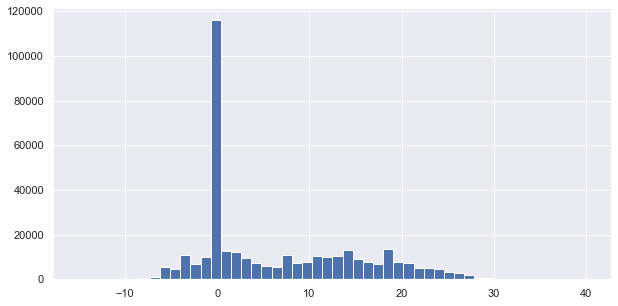

In [41]:
numeric['nutrition-score-fr_100g'].hist(bins=50,figsize=(10,5))
   

<AxesSubplot:>

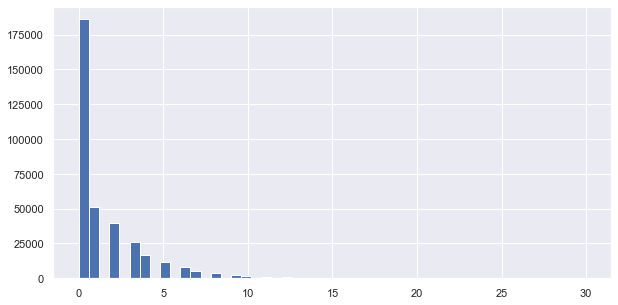

In [42]:
numeric['additives_n'].hist(bins=50,figsize=(10,5))

array([[<AxesSubplot:title={'center':'energy_100g'}>,
        <AxesSubplot:title={'center':'sugars_100g'}>],
       [<AxesSubplot:title={'center':'salt_100g'}>,
        <AxesSubplot:title={'center':'saturated-fat_100g'}>],
       [<AxesSubplot:title={'center':'fiber_100g'}>,
        <AxesSubplot:title={'center':'proteins_100g'}>]], dtype=object)

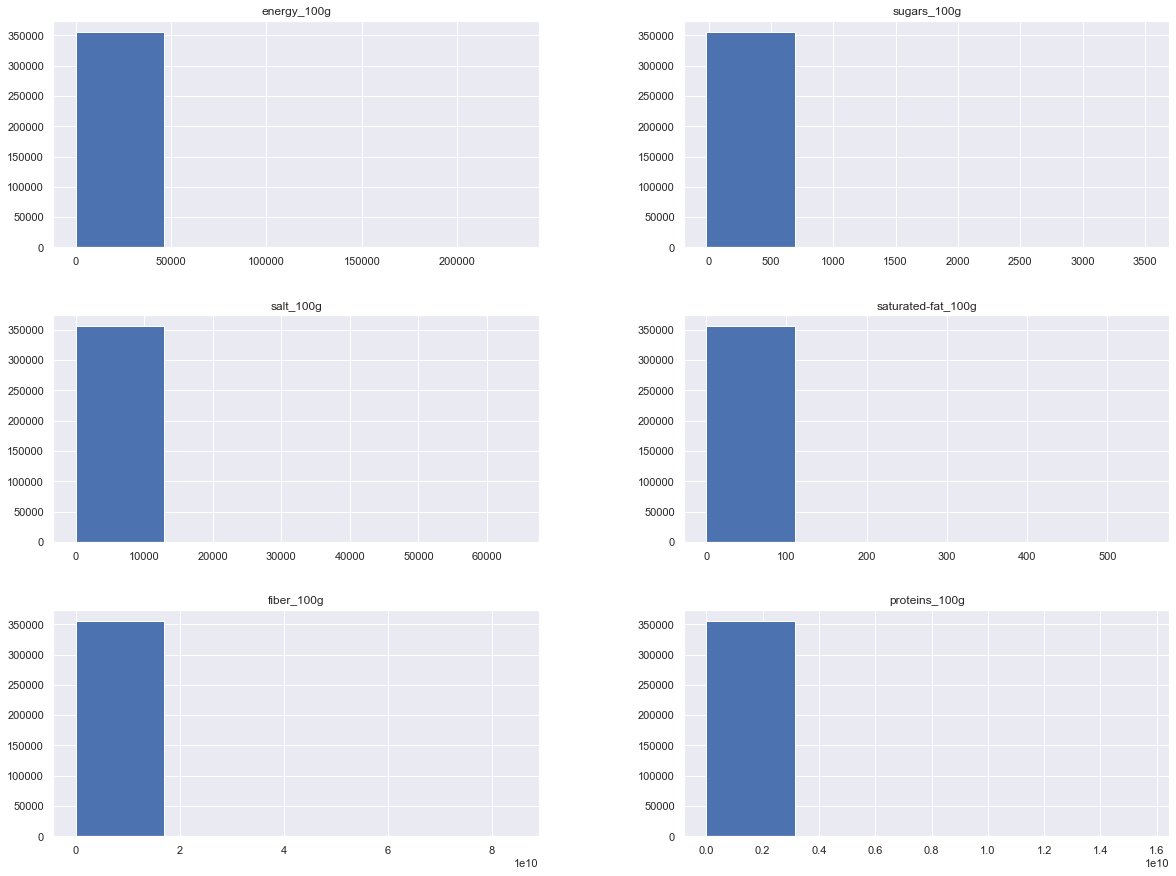

In [43]:
scoring_features = ['nutrition_scoring', 'bio_scoring', 'no_ingredients_scoring',
          'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
          'sugars_100g_scoring', 'saturated-fat_100g_scoring',
          'fiber_100g_scoring', 'proteins_100g_scoring', 'nova_scoring']
quantity_features = ['energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g' ]
df[quantity_features].hist(bins=5, figsize=(20,15))

Doing a plot with numerical values

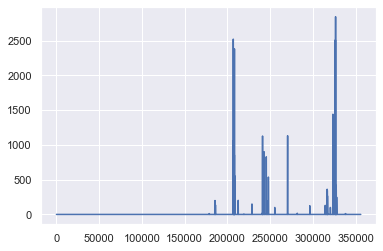

In [44]:
plt.plot(numeric[['carbon-footprint_100g']])

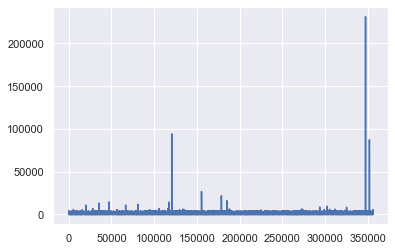

In [45]:
plt.plot(numeric[['energy_100g']])

A reminder of numerical values....

In [46]:
list(numeric.columns)

['no_nutriments',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoi

(array([1.89682e+05, 2.40860e+04, 1.58610e+04, 1.25390e+04, 1.28970e+04,
        1.00940e+04, 1.04270e+04, 7.75800e+03, 1.10120e+04, 6.67900e+03,
        9.01100e+03, 6.82800e+03, 9.09400e+03, 4.10000e+03, 4.82100e+03,
        2.37700e+03, 2.15500e+03, 1.72200e+03, 2.38000e+03, 6.44000e+02,
        2.57100e+03, 1.31400e+03, 7.78000e+02, 2.26000e+02, 4.36000e+02,
        3.61000e+02, 3.21000e+02, 1.49000e+02, 4.92000e+02, 1.98000e+02,
        1.83000e+02, 5.69000e+02, 7.28000e+02, 9.00000e+01, 1.04000e+02,
        1.40000e+01, 5.32000e+02, 1.17800e+03, 1.10000e+01, 1.03000e+02,
        1.49900e+03, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
         45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
         67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5

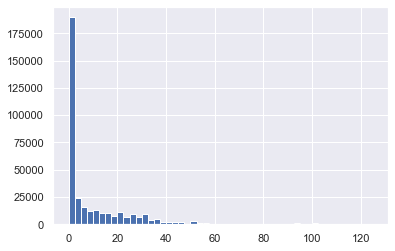

In [47]:
plt.hist(numeric['fat_100g'], bins=50, range=(0,125))

(array([1.99071e+05, 6.65050e+04, 3.30190e+04, 1.95460e+04, 1.38950e+04,
        1.05840e+04, 8.60200e+03, 1.93400e+03, 7.23000e+02, 7.57000e+02,
        3.64000e+02, 1.89000e+02, 2.48000e+02, 1.17000e+02, 5.90000e+01,
        8.50000e+01, 6.70000e+01, 4.80000e+01, 6.90000e+01, 6.80000e+01,
        2.90000e+01, 2.00000e+01, 7.00000e+00, 1.00000e+00, 1.20000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([  0.        ,   4.16666667,   8.33333333,  12.5       ,
         16.66666667,  20.83333333,  25.        ,  29.16666667,
         33.33333333,  37.5       ,  41.66666667,  45.83333333,
         50.        ,  54.16666667,  58.33333333,  62.5       ,
         66.66666667,  70.83333333,  75.        ,  79.16666667,
         83.33333333,  87.5       ,  91.66666667,  95.83333333,
        100.        , 104.16666667, 108.33333333, 112.5       ,
        116.66666667, 120.83333333, 125.        ]),
 <BarContainer object of 30 artists>)

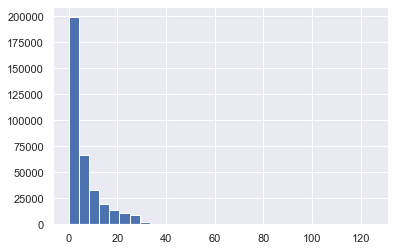

In [48]:
plt.hist(numeric['proteins_100g'],bins=30, range=(0,125))

(array([1.35701e+05, 2.91940e+04, 2.30140e+04, 1.83760e+04, 1.26350e+04,
        8.73600e+03, 8.95800e+03, 7.02200e+03, 3.88600e+03, 4.93000e+03,
        6.28600e+03, 7.17000e+03, 1.23620e+04, 9.64700e+03, 1.06200e+04,
        9.24100e+03, 1.07920e+04, 1.01640e+04, 9.03200e+03, 6.72400e+03,
        2.98800e+03, 2.99100e+03, 2.04800e+03, 8.09000e+02, 2.68800e+03,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([  0.        ,   4.16666667,   8.33333333,  12.5       ,
         16.66666667,  20.83333333,  25.        ,  29.16666667,
         33.33333333,  37.5       ,  41.66666667,  45.83333333,
         50.        ,  54.16666667,  58.33333333,  62.5       ,
         66.66666667,  70.83333333,  75.        ,  79.16666667,
         83.33333333,  87.5       ,  91.66666667,  95.83333333,
        100.        , 104.16666667, 108.33333333, 112.5       ,
        116.66666667, 120.83333333, 125.        ]),
 <BarContainer object of 30 artists>)

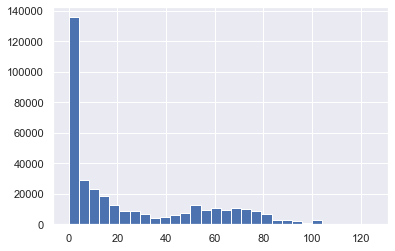

In [49]:
plt.hist(numeric['carbohydrates_100g'], bins=30, range=(0,125))

(array([211785.,  31118.,  23624.,  10593.,  12106.,  10722.,   8762.,
          7306.,   7087.,   5769.,   6742.,   4678.,   3778.,   2565.,
          2226.,   2230.,   1519.,   1025.,    889.,   1483.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

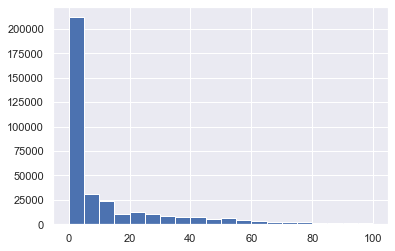

In [50]:
plt.hist(numeric['sugars_100g'],bins=20,range=(0,100))

Histograms show uniform distribution but we have to delete outliers data.

### Are there columns that contain lists? ex. lists of ingredients, tags

In [51]:
df.count()

code                       356027
url                        356027
creator                    356027
created_t                  356027
created_datetime           356027
                            ...  
carbon-footprint_100g      356027
nutrition-score-fr_100g    356027
nutrition-score-uk_100g    356027
glycemic-index_100g        356027
water-hardness_100g        356027
Length: 163, dtype: int64

count(element) functions returns the occurence count of given element in a list. If it is greater than 0, it means given element exist in list. 
  

### Are there columns that are very similar in their content?

In [52]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,356027.0,356027.000000,356027.000000,356027.0,356027.000000,356027.0,356027.0,356027.000000,356027.000000,3.560270e+05,...,356027.000000,356027.000000,356027.000000,356027.000000,356027.0,356027.000000,356027.000000,356027.000000,356027.0,356027.0
mean,0.0,1.496448,0.018681,0.0,0.047628,0.0,0.0,933.698205,1.433294,4.401420e+04,...,0.302762,0.068493,0.007853,0.202395,0.0,0.262199,6.561427,6.428653,0.0,0.0
std,0.0,2.357237,0.137026,0.0,0.251756,0.0,0.0,952.444890,45.605997,2.625640e+07,...,4.453469,2.258064,0.357098,3.451068,0.0,15.078104,8.664376,8.738437,0.0,0.0
min,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-15.000000,-15.000000,0.0,0.0
25%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,146.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,787.000000,0.000000,1.700000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,2.000000,0.0,0.0
75%,0.0,2.000000,0.000000,0.0,0.000000,0.0,0.0,1569.000000,0.000000,1.504000e+01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,14.000000,14.000000,0.0,0.0
max,0.0,30.000000,2.000000,0.0,6.000000,0.0,0.0,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,0.0,2842.000000,40.000000,40.000000,0.0,0.0


We can use the fonction describe() used in request 15 and we can check if values are similarly for some of them:\n",

-nutrition_grade_uk/nutrition-score-fr_100g

-fruits-vegetables-nuts_100g/fruits-vegetables-nuts-estimate_100g

-ingredients_that_may_be_from_palm_oil/ingredients_from_palm_oil..

In [53]:
df['nutrition-score-fr_100g'].equals(df['nutrition-score-uk_100g'])

False

In [54]:
df['fruits-vegetables-nuts_100g'].equals(df['fruits-vegetables-nuts-estimate_100g'])

False

In [55]:
df['ingredients_that_may_be_from_palm_oil'].equals(df['ingredients_from_palm_oil'])

True

So we have similar columns for example: ingredients_that_may_be_from_palm_oil/ingredients_from_palm_oil.

### Are columns with text always written using the same alphabet?

Maybe in data frame some columns contains special characters, how to find the columns contains special characters.

I decided to use generic_name as an example for the test.

In [56]:
import string
alphabet=string.ascii_letters+string.punctuation
df['generic_name'].str.strip(alphabet).astype(bool).any()

True

So we have different alphabet.

## For categorical columns, what are the top 10 most frequent values?

We prepare the \"categorical\" data before to use count function.

In [57]:
df.select_dtypes(include=['object']).head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,0,1kg,...,0,0,0,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",0,0,0,0
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),0,0,...,d,0,0,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",0,0,0,0


In [58]:
print(list(df.select_dtypes(include=['object']).columns))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url']


The idea is to differentiate  the categorical  columns to the numeric columns.So we delete numerical values on a new dataframe and to have at the end only categorical values in the final dataframe.
   

In [59]:
cols=df.columns

In [60]:
cols_num=df._get_numeric_data().columns

In [61]:
A=list(set(cols)-set(cols_num))
A[:5]

['cities', 'origins_tags', 'generic_name', 'brands_tags', 'categories_en']

Using request :".values_count().sort_values()"  etc with one categorical column.

In [62]:
df['countries_tags'].value_counts().sort_values(ascending=False).head(10)

en:united-states            173159
en:france                   123960
en:switzerland               14932
en:germany                    8470
en:spain                      5529
en:united-kingdom             5092
en:belgium                    2936
en:australia                  2201
en:russia                     1582
en:france,en:switzerland      1492
Name: countries_tags, dtype: int64

In [63]:
print(list(df['states_tags'].value_counts().sort_values(ascending=False)[:10]))

[167862, 20762, 17094, 13439, 12018, 8860, 8194, 6888, 6791, 5521]


In [64]:
print(list(df['allergens'].value_counts().sort_values(ascending=False)[:10]))

[318851, 1495, 993, 833, 607, 566, 350, 337, 323, 271]


In [65]:
print(list(df['origins_tags'].value_counts().sort_values(ascending=False)[:10]))

[331015, 6289, 783, 613, 564, 519, 440, 295, 283, 262]


In [66]:
print(list(df['additives_tags'].value_counts().sort_values(ascending=False)[:25]))

[185838, 8656, 7955, 7673, 3661, 2569, 2080, 1628, 1211, 1167, 1084, 1047, 1030, 1000, 996, 989, 894, 821, 781, 718, 695, 667, 659, 636, 633]


### Are there duplicate products?

In [137]:
#'product_name'
DDP=df.duplicated(subset=['product_name'])

We observe duplicate product because in the printed list we see bolean value True

In [68]:
DDPS=df.duplicated(subset=['product_name']).sum()
print( DDPS)

106781


In [69]:
subset_df=['product_name','quantity','countries',
'additives_n',
'additives',
'additives_tags',
'additives_en',
'ingredients_from_palm_oil_n',
'ingredients_from_palm_oil',
'ingredients_from_palm_oil_tags',
'ingredients_that_may_be_from_palm_oil_n',
'ingredients_that_may_be_from_palm_oil',
'ingredients_that_may_be_from_palm_oil_tags']

In [70]:
DDPSS=df.duplicated(subset=subset_df).sum()
print( DDPSS)

30596


In [71]:
DDP.head(5)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [72]:
#df=DDP

## B.In-depth analysis
  
### Are products  number of additives correlated with their nutrition scores

In [73]:
mycolumns2=['additives_n','nutrition_grade_fr']
(df[mycolumns2].head(5))
   

,additives_n,nutrition_grade_fr
0,0.0,0
1,0.0,d
2,0.0,b
3,0.0,d
4,0.0,0


In [74]:
mycolumns3=['additives_n','nutrition_grade_fr']
(df[mycolumns3].head(5))

,additives_n,nutrition_grade_fr
0,0.0,0
1,0.0,d
2,0.0,b
3,0.0,d
4,0.0,0


Clearly we can't work with ik scores we have to deal with fr scores

In [75]:
df1_nan_replaced=df.replace(np.nan,0)
df1_nan_replaced.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,0,1kg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can use pairplot to have a graphic and to see if we see a correlation.

In [76]:
df1_nan_replaced['additives_n'][:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: additives_n, dtype: float64

In [77]:
df1_nan_replaced['nutrition-score-fr_100g'][:10]

0     0.0
1    14.0
2     0.0
3    12.0
4     0.0
5     0.0
6     0.0
7     7.0
8     0.0
9     0.0
Name: nutrition-score-fr_100g, dtype: float64

Using matrix to see correlation or not .

<AxesSubplot:title={'center':'Vérification de la correlation entre les additifs et la nutrition score'}>

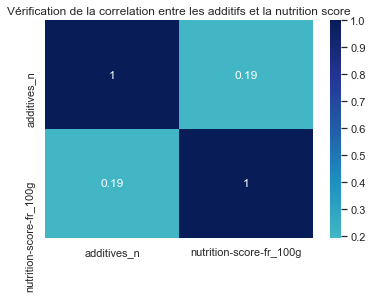

In [78]:
corr_matric0=df1_nan_replaced.corr()
corr=['additives_n','nutrition-score-fr_100g']
plt.title('Vérification de la correlation entre les additifs et la nutrition score')
sns.heatmap(corr_matric0[corr].loc[corr], 
    xticklabels=corr_matric0[corr].loc[corr].columns,
    yticklabels=corr_matric0[corr].loc[corr].columns, cmap="YlGnBu" ,center=0.20, annot=True)

We don't have correlation between  number of additives and nutrition scores

### Are there countries with more or less risky additives? This additional list may help.
   
We investigate about more or less risky additives

In [79]:
df1_nan_replaced['additives_tags'].value_counts().sort_values(ascending=False).head(10)

0                           185838
en:e330                       8656
en:e322,en:e322i              7955
en:e101,en:e101i,en:e375      7673
en:e300                       3661
en:e415                       2569
en:e300,en:e330               2080
en:e440,en:e440i              1628
en:e330,en:e509               1211
en:e160b                      1167
Name: additives_tags, dtype: int64

My aim here is to define level of risk for each additive:

-level 1: "No or very low risk of over exposure"

-level 2: "Moderate risk of over exposure"

-level 3: "High risk of over exposure"


So I decided to define a list of ingredients for each level.

In [80]:
Level_3=str(['e202','e407','e450','e250','e150c','e341','e211','e621','e200','e481','e340','e452','e339','e223','e338','e451','e150a','e220','e252','e212','e224','e150d','e491','e222','e251','e470a','e494','e221','e473','e343','e210','e482','e228','e155','e243','e226','e494','e459','e493','e213','e227'])
    
Level_2=str(['e133','e435','e433','e960','e131','e142','e436','e432','e434'])
   
Level_1=str(['e129','e316','e951','e1520','e132','e170i','e315','e150b','e122','e151','e123'])

I decided to do a focus for only products with risky additives. I can do a modification of the dataframe for example here I have a dataframe wich I select product the more risky. I use str.contains to be sure I have only product with high level of risk.

In [81]:
DFMR=df1_nan_replaced[df1_nan_replaced['additives_tags'].str.contains(Level_3)==True]
DFMR.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
7,0000000016124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0
21,0000000018289,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055655,2017-03-09T10:34:15Z,Antioxidant Mix - Berries & Chocolate,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,0.0,0.0
23,0000000018340,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055721,2017-03-09T10:35:21Z,1489055721,2017-03-09T10:35:21Z,Fire Roasted Hatch Green Chile Almonds,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,0.0,0.0
24,0000000018357,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138486,2017-03-10T09:34:46Z,1489138486,2017-03-10T09:34:46Z,Peanut Butter Power Chews,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0
29,0000000018418,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055714,2017-03-09T10:35:14Z,1489055714,2017-03-09T10:35:14Z,Wasabi Tamari Almonds,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0


In [82]:
DFMR['product_name'].head(5)

7                             Organic Muesli
21     Antioxidant Mix - Berries & Chocolate
23    Fire Roasted Hatch Green Chile Almonds
24                 Peanut Butter Power Chews
29                     Wasabi Tamari Almonds
Name: product_name, dtype: object

So we can see that the list of product with more risk are: organic muesli, Antioxidant Mix-Berries&Chocolate, Fire Roasted Hatch Green Chile Almonds..."


## Comments/Correction

We can add different visualization.

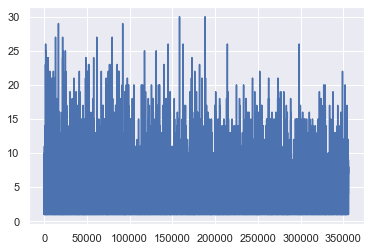

In [83]:
fig = plt.figure()
plt.plot(DFMR['additives_n'])
#ax.set(xlabel="created date",
           #ylabel="Number of items ",
           #title="Monthly created items between 2010-2017")
#ax.title.set_fontsize(20)

plt.show()

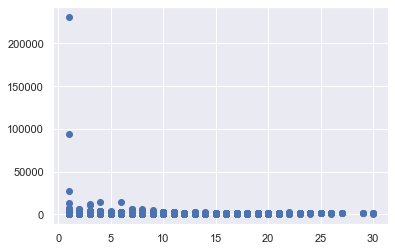

In [84]:

plt.scatter(DFMR['additives_n'],DFMR['energy_100g'])
#ax.set(xlabel="created date",
           #ylabel="Number of items ",
           #title="Monthly created items between 2010-2017")
#ax.title.set_fontsize(20)

plt.show()

### What product category is most prone to having many additives?

In [85]:
mycolumns3=['additives_n','categories']
dfC=df1_nan_replaced['additives_n'].value_counts().sort_values(ascending=True).head(10)
dfC.head(5)

29.0    3
30.0    4
27.0    4
26.0    7
25.0    8
Name: additives_n, dtype: int64

## Comments/Correction

We can add different visualization.

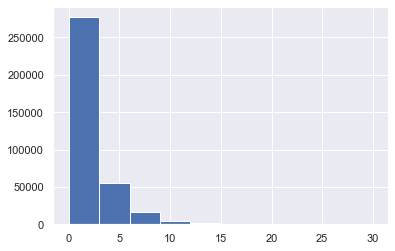

In [86]:
plt.hist(df1_nan_replaced['additives_n'])
plt.show()

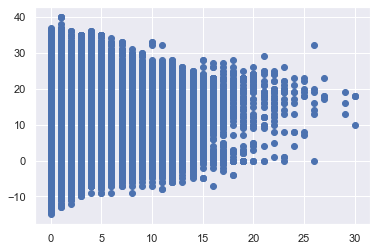

In [87]:
plt.scatter(df1_nan_replaced['additives_n'], df1_nan_replaced['nutrition-score-fr_100g'] )

# C Text data
### We prepare a dataframe with only text values

In [88]:
pd.set_option('display.max_colwidth',-1)

<ipython-input-88-dc5dda32fe3d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [89]:
print(df['ingredients_text'][:5])

0    0                                                                                                                                                                     
1    Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.                                                                          
2    Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.
3    Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.                                                                         
4    Organic polenta                                                                                                                                                       
Name: ingredients_text, dtype: object


In [90]:
GIT=df['ingredients_text'].dropna()
GIT[:5]

0    0                                                                                                                                                                     
1    Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.                                                                          
2    Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.
3    Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.                                                                         
4    Organic polenta                                                                                                                                                       
Name: ingredients_text, dtype: object

### 1.capitalization e.g. "water" vs "Water"

In [91]:
GIT=GIT.str.lower()
GIT.sample(5)

186244    NaN                                                                                                                                                                                                                                       
303211    NaN                                                                                                                                                                                                                                       
346397    NaN                                                                                                                                                                                                                                       
52026     grape juice and grape juice concentrate, high fructose corn syrup, corn syrup, fruit pectin, citric acid and sodium citrate.                                                                                                              
79198     prepared b

In [92]:
### 2.punctuation e.g. "water." vs"water"

In [93]:
GIT=GIT.str.replace('.','')
GIT.sample(5)

50252     chicken broth, carrots, potatoes, celery, peas, diced tomatoes (tomatoes, tomato juice, salt, citric acid, calcium chloride), green beans, corn, tomato paste, high fructose corn syrup, contains less than 2% of modified food starch, onions, flavoring (minerals [potassium chloride, magnesium chloride, magnesium sulfate], yeast extract, natural flavor), salt, sea salt, hydrolyzed soy and wheat gluten proteins, onion powder, dextrose, spice extract, garlic powder, dehydrated parsley, disodium inosinate, disodium guanylate
521       sugar, almonds (30%), glucose syrup, honey, egg white, wafers (potato starch, water, vegetable oil), corn starch, flavourings                                                                                                                                                                                                                                                                                                                                           

### 3.white spaces removal e.g. " water" vs "water"

In [94]:
GIT=GIT.str.replace('  ',' ')
#GIT=GIT.str.replace('(',',')
#GIT=GIT.str.replace(')',',')
GIT=GIT.str.replace('[-()%_:/;?&{}*]',',')
GIT=GIT.str.replace('[',',')
GIT=GIT.str.replace(']',',')
GIT=GIT.str.replace('[0-9]','')
GIT=GIT.str.replace(',,',',')
GIT=GIT.str.replace(' and| or',',')
#a enlever @ et --

In [95]:
GIT.sample(5)

349442    purée de tomates mi,réduite  , sucre, vinaigre de malt ,orge,, vinaigre, sel, concentré de raisins secs , , graines de ,moutarde, en poudre, pulpe de pommes , , épices, amidon modifié, gingembre, colorant ,caramel,dinaire, épaississant ,gomme guar, arômes ,contiennent du ,céleri,
129874    tomato puree ,water, tomato paste, diced tomatoes ,tomatoes, citric acid, sugar, dried onions, dehydrated garlic, salt, basil, extra virgin olive oil,,egano, citric acid, natural flavor                                                                                               
18714     chicory root extract ,inulin, enriched wheat flour ,bleached wheat flour, malted barley flour, niacin, reduced iron, thiamin mononitrate, riboflavin, folic acid, sugar, chocolate flavored chips ,sugar, palm kernel, palm oil, cocoa ,processed with alk                              
76602     vegetables, green cabbage, romaine lettuce, kale, red cabbage, carrots, green onion grain mix, red rice ,water, red r

In [96]:

GIT2=GIT.str.split(pat=",", expand=True)


In [97]:
list_ingredients=GIT2.values.flatten()
list_ingredients[:5]

array([nan, nan, nan, nan, nan], dtype=object)

In [98]:

#GIT.str.lstrip()
#GIT.str.rstrip()
list_series=pd.Series(list_ingredients)
list_series.sample(5)

61389946     sel 
74094833     None
3185399      None
103112857    NaN 
22206634     None
dtype: object

In [99]:
list_series=list_series.str.strip()


In [100]:
list_series=list_series.replace('',np.nan)
list_series=list_series.dropna()

In [101]:
list_series=list_series.replace('None',np.nan)
list_series=list_series.dropna()

In [102]:
list_series.sample(5)

781643      natural      
92096854    de tilleul   
66159748    fromage frais
6075789     poires       
8164593     sugar        
dtype: object

### Also, what is missing in your approach is the listing of the top 5 ingredients. Something like value_counts that you use in Task B is a great solution for that.

In [103]:
pd.value_counts(list_series).head(50)

salt                        109610
sugar                       81215 
water                       75430 
sel                         55016 
sucre                       43987 
e                           42432 
eau                         41960 
citric acid                 35874 
lait                        27663 
riboflavin                  22770 
folic acid                  22514 
dextrose                    22399 
niacin                      21724 
corn syrup                  20441 
wheat flour                 20057 
blé                         19941 
natural flavor              18620 
soy lecithin                18095 
spices                      17754 
sea salt                    16116 
enzymes                     15168 
milk                        14425 
soybean oil                 14379 
reduced iron                13576 
natural                     12970 
natural flavors             12832 
thiamine mononitrate        12714 
vitamin b                   12637 
émulsifiant         

In [104]:
#Attention il faut remplacer la traduction de chaque ingredient dans une cellule dédiée 

In [105]:
list_series=list_series.replace(to_replace='salt',value='sel')

In [106]:
list_series=list_series.replace(to_replace='sea salt',value='sel')

In [107]:
list_series=list_series.replace(to_replace='water',value='eau')

In [108]:
list_series=list_series.replace(to_replace='sugar',value='sucre')

In [109]:
pd.value_counts(list_series).head(50)

sel                         180742
sucre                       125202
eau                         117390
e                           42432 
citric acid                 35874 
lait                        27663 
riboflavin                  22770 
folic acid                  22514 
dextrose                    22399 
niacin                      21724 
corn syrup                  20441 
wheat flour                 20057 
blé                         19941 
natural flavor              18620 
soy lecithin                18095 
spices                      17754 
enzymes                     15168 
milk                        14425 
soybean oil                 14379 
reduced iron                13576 
natural                     12970 
natural flavors             12832 
thiamine mononitrate        12714 
vitamin b                   12637 
émulsifiant                 12543 
garlic                      12015 
sirop de glucose            11884 
cream                       11817 
high fructose corn s

### D.Time_series analysis
  


In [110]:
# Date time column preprocessing: created_datetime
df['created_datetime'].isnull().sum()

0

In [111]:
df['created_datetime'].fillna(0, inplace=True)

You will investigate more closely the created_datetime and last_modified_datetime. First,you will analyze the mean time difference between these two values.

In [112]:
m=(pd.to_datetime(df['created_datetime'],errors='coerce')-pd.to_datetime(df['last_modified_datetime'],errors='coerce')).dt.days.mean()
print('The mean difference is : {}'.format(m))

The mean difference is : -108.62183252294236


## With respect to Task D, smallest of comments - your mean difference is a negative number, this doesn't make sense. Also, what does this number represent? Months, weeks, hours?

We do a difference between last_modified_datetime and created_datetime. So if we have a negative value, it looks like that we have aberrant values for last_modified_datetime.

Here the mean difference is negative, it looks like that aberrant values impact the mean difference. Here it is day mean. 

Second, you will analyze the total number of items created each month over the full timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings."

In [113]:
# We change the type of the date column into datetime
df['created_datetime']=pd.to_datetime(df['created_datetime'],errors='coerce')
df.dtypes

code                       object             
url                        object             
creator                    object             
created_t                  object             
created_datetime           datetime64[ns, UTC]
                                  ...         
carbon-footprint_100g      float64            
nutrition-score-fr_100g    float64            
nutrition-score-uk_100g    float64            
glycemic-index_100g        float64            
water-hardness_100g        float64            
Length: 163, dtype: object

In [114]:
# Now that the Date column is the correct data type, let’s set it as the DataFrame’s index.
df_timeseries = df.set_index('created_datetime')
df_timeseries.head()

,code,url,creator,created_t,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
created_datetime,,,,,,,,,,,,,,,,,,,,,
2016-09-17 09:17:46+00:00,0000000003087,http://world-en.openfoodfacts.org/product/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,0,1kg,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-09 14:32:37+00:00,0000000004530,http://world-en.openfoodfacts.org/product/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0
2017-03-09 14:32:37+00:00,0000000004559,http://world-en.openfoodfacts.org/product/0000000004559/peanuts-torn-glasser,usda-ndb-import,1489069957,1489069957,2017-03-09T14:32:37Z,Peanuts,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-09 10:35:31+00:00,0000000016087,http://world-en.openfoodfacts.org/product/0000000016087/organic-salted-nut-mix-grizzlies,usda-ndb-import,1489055731,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0
2017-03-09 10:34:13+00:00,0000000016094,http://world-en.openfoodfacts.org/product/0000000016094/organic-polenta-bob-s-red-mill,usda-ndb-import,1489055653,1489055653,2017-03-09T10:34:13Z,Organic Polenta,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Reasmple the dataframe by month,
df_timeseries_monthly = df_timeseries.resample('M').count()
df_timeseries_monthly.tail(3)

,code,url,creator,created_t,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
created_datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-31 00:00:00+00:00,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979,...,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979
2017-08-31 00:00:00+00:00,8636,8636,8636,8636,8636,8636,8636,8636,8636,8636,...,8636,8636,8636,8636,8636,8636,8636,8636,8636,8636
2017-09-30 00:00:00+00:00,4873,4873,4873,4873,4873,4873,4873,4873,4873,4873,...,4873,4873,4873,4873,4873,4873,4873,4873,4873,4873


Text(0.5, 1.0, 'Monthly created items between 2010-2017')

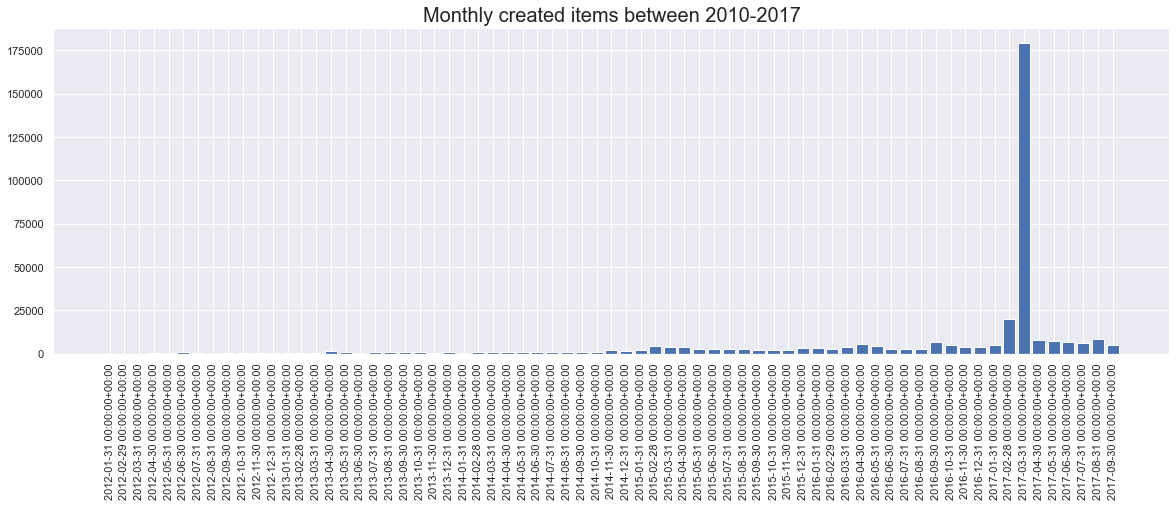

In [116]:
#Focus on 2010-2017 data points
import matplotlib.dates as mdates
fig2, ax2 = plt.subplots(figsize=(20, 6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.bar(df_timeseries_monthly['2012':].index, df_timeseries_monthly.loc['2012':, "code"], width=25, align='center', tick_label=df_timeseries_monthly['2012':].index)
plt.xticks(rotation=90)
ax2.set_title("Monthly created items between 2010-2017",fontsize=20)

Text(0.5, 1.0, 'Monthly created items between 2015-2017')

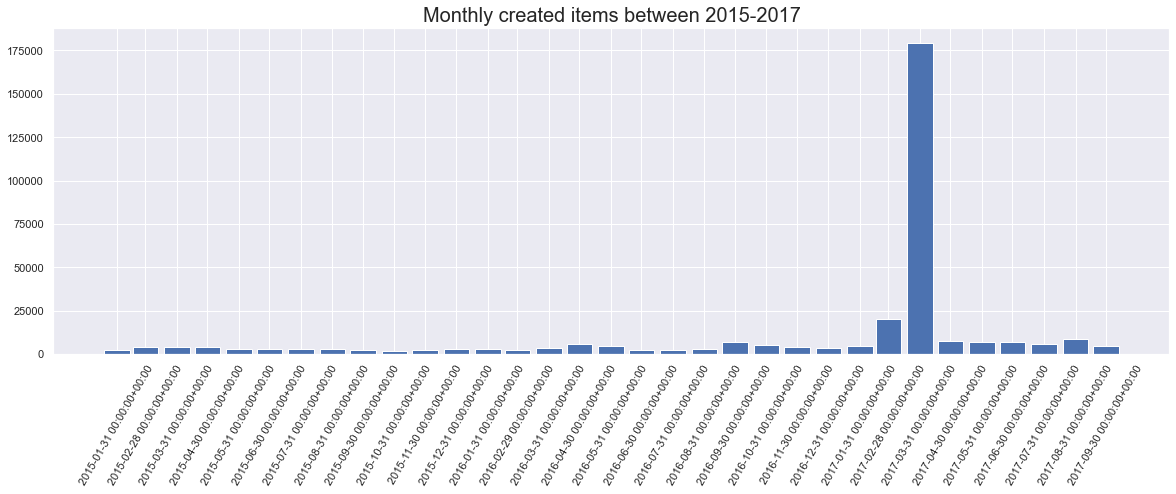

In [117]:
#Focus on 2015-2017 data points
    
import matplotlib.dates as mdates
fig2, ax2 = plt.subplots(figsize=(20, 6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.bar(df_timeseries_monthly['2015':].index, df_timeseries_monthly.loc['2015':, "code"], width=25, align='center', tick_label=df_timeseries_monthly['2015':].index)
plt.xticks(rotation=60)
ax2.set_title("Monthly created items between 2015-2017",fontsize=20)

•	The command df_timeseries_monthly = df_timeseries.resample('M').count() actually crashed my Jupyter kernel every time I tried to run it. I'm rarely able to do so myself :-) I believe it has to do that this line tries to resample and count the values for all 162 features. As we are not interested in the individual features themselves, but only on how many entries per month we have, we can reduce the computational demand by just looking at one column. So, this code would do the same trick: df_timeseries_monthly = df_timeseries['code'].resample('M').count()


•	Actually, to make the previous code work with the rest of your notebook, you would need: df_timeseries_monthly = df_timeseries.loc[:, :"code"].resample('M').count()



In [118]:
df_timeseries_monthly = df_timeseries.loc[:, :"code"].resample('M').count()

## Comments/correction :
•	An even simpler way to plot the "monthly created items" is to use the pandas plotting function and do something like df_timeseries_monthly.plot().

<AxesSubplot:xlabel='created_datetime'>

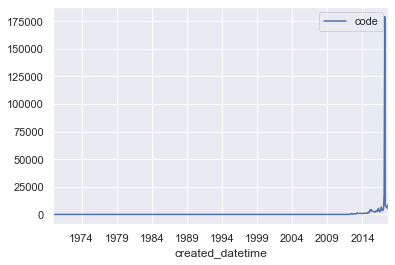

In [119]:
df_timeseries_monthly.plot()

We can notice we data >0 since 2010 !

### E.Build a database"
  
### 1. Building a dataframe  restricted 1000 entries and 5 columns.

In [120]:
my_columns2=['code','energy_100g','nutrition-score-fr_100g','proteins_100g','vitamin-c_100g']
DB=df[my_columns2][:1000]
print(DB.head(5))

            code  energy_100g  nutrition-score-fr_100g  proteins_100g  \
0  0000000003087  0.0          0.0                      0.00            
1  0000000004530  2243.0       14.0                     3.57            
2  0000000004559  1941.0       0.0                      17.86           
3  0000000016087  2540.0       12.0                     17.86           
4  0000000016094  1552.0       0.0                      8.57            

   vitamin-c_100g  
0  0.0000          
1  0.0214          
2  0.0000          
3  0.0000          
4  0.0000          


### 2. Creating the connection to sqlite3 database

In [121]:
import pandas as pd
import sqlite3
db = sqlite3.connect('database.sqlite')
def run_query(query):
    return pd.read_sql_query(query,db)
cursor = db.cursor()

### 3. Creating one table with CODE column as primary key and 4.Fill the database with your data.
   

In [122]:
DB.to_sql(name='Table_Food',con=db, if_exists='append', index=False)

### 5. Running one query

In [123]:
run_query("SELECT * FROM Table_Food LIMIT 5;")

,code,energy_100g,nutrition-score-fr_100g,proteins_100g,vitamin-c_100g
0,0000000003087,0.0,0.0,0.00,0.0000
1,0000000004530,2243.0,14.0,3.57,0.0214
2,0000000004559,1941.0,0.0,17.86,0.0000
3,0000000016087,2540.0,12.0,17.86,0.0000
4,0000000016094,1552.0,0.0,8.57,0.0000


## F.Finding correlations

For this part we have to work with only numeric columns hence we create a list of numeric columns to remember all values we need.

In [124]:
list(numeric.columns[:5])

['no_nutriments',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n']

In [125]:
numeric.head(5)

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2243.0,0.0,28.57,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941.0,0.0,17.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2540.0,0.0,57.14,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1552.0,0.0,1.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
numeric.shape

(356027, 107)

In [127]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
no_nutriments,356027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
additives_n,356027.0,1.496448,2.357237,0.0,0.0,0.0,2.0,30.0
ingredients_from_palm_oil_n,356027.0,0.018681,0.137026,0.0,0.0,0.0,0.0,2.0
ingredients_from_palm_oil,356027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ingredients_that_may_be_from_palm_oil_n,356027.0,0.047628,0.251756,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...
carbon-footprint_100g,356027.0,0.262199,15.078104,0.0,0.0,0.0,0.0,2842.0
nutrition-score-fr_100g,356027.0,6.561427,8.664376,-15.0,0.0,2.0,14.0,40.0
nutrition-score-uk_100g,356027.0,6.428653,8.738437,-15.0,0.0,2.0,14.0,40.0
glycemic-index_100g,356027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## Task F: The answer to this question is still not given. What we are looking for is not just a visualization of the correlation matrix, but a numerical ordering of all correlations with a clear written statement (in markdown text), about what the highest correlated feature is. Using numeric.corr() is a great idea. But after that you shouldn't focus only on a few entries, rather select all correlations with 'nutrition-score-fr_100g' - or alternatively, use the corrwith() function.

We visualise correlation using a matrix.

In [128]:
corr_matric=numeric.corr()

In [129]:
corr_matric
corr_matric['nutrition-score-fr_100g'].sort_values(ascending=False).head(15)

nutrition-score-fr_100g                    1.000000
nutrition-score-uk_100g                    0.983245
saturated-fat_100g                         0.611675
energy_100g                                0.561063
sugars_100g                                0.424895
additives_n                                0.194002
ingredients_from_palm_oil_n                0.130692
cocoa_100g                                 0.079217
ingredients_that_may_be_from_palm_oil_n    0.074428
polyunsaturated-fat_100g                   0.032611
cholesterol_100g                           0.028304
energy-from-fat_100g                       0.023596
monounsaturated-fat_100g                   0.022208
trans-fat_100g                             0.021284
calcium_100g                               0.012715
Name: nutrition-score-fr_100g, dtype: float64

#En voyant ces résultats les variables qui ont une relation las plus forte linéaire sont saturated-fat_100g et sugars_100G and energy_100g.

In [130]:
#faire scatter plot pour visualiser 

In [131]:
qty=['energy_100g','sugars_100g','salt_100g','saturated-fat_100g','proteins_100g']

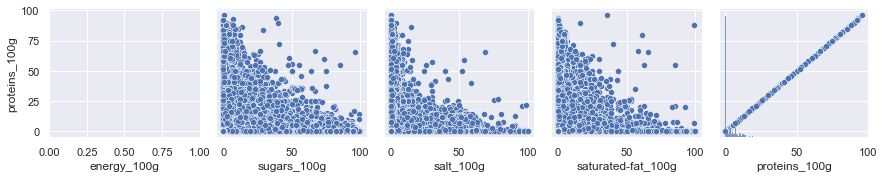

In [132]:
sns.pairplot(df_columns_100g, x_vars=qty, y_vars='proteins_100g')

<AxesSubplot:title={'center':'Corrélation entre les principaux nutriments'}>

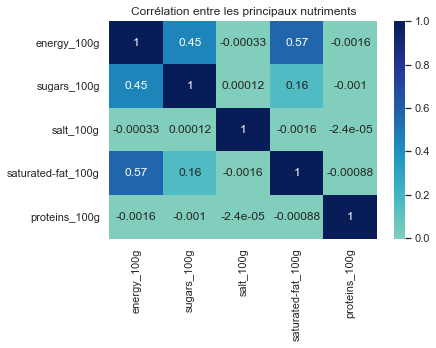

In [133]:
plt.title('Corrélation entre les principaux nutriments')
sns.heatmap(corr_matric[qty].loc[qty],
        xticklabels=corr_matric[qty].loc[qty].columns,
        yticklabels=corr_matric[qty].loc[qty].columns,cmap="YlGnBu" ,center=0.20, annot=True)


  Clearly we can see correlation between sugars_100g and energy_100g or saturated-fat_100g and energy_100g

### The focus should be on the correlation with the nutrition score

In [134]:
corr_matric2=numeric.corr()
qty2=['energy_100g','sugars_100g','salt_100g','saturated-fat_100g','fiber_100g','proteins_100g','nutrition-score-fr_100g', 'nutrition-score-uk_100g']
corr_matric2[qty2].loc[qty2]

,energy_100g,sugars_100g,salt_100g,saturated-fat_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
energy_100g,1.000000,0.445385,-0.000334,0.567883,-0.000907,-0.001643,0.561063,0.582022
sugars_100g,0.445385,1.000000,0.000118,0.155430,-0.000105,-0.001004,0.424895,0.415724
salt_100g,-0.000334,0.000118,1.000000,-0.001555,-0.000009,-0.000024,0.006576,0.006819
saturated-fat_100g,0.567883,0.155430,-0.001555,1.000000,-0.000645,-0.000877,0.611675,0.631336
fiber_100g,-0.000907,-0.000105,-0.000009,-0.000645,1.000000,-0.000003,-0.000882,-0.000849
proteins_100g,-0.001643,-0.001004,-0.000024,-0.000877,-0.000003,1.000000,-0.001269,-0.001233
nutrition-score-fr_100g,0.561063,0.424895,0.006576,0.611675,-0.000882,-0.001269,1.000000,0.983245
nutrition-score-uk_100g,0.582022,0.415724,0.006819,0.631336,-0.000849,-0.001233,0.983245,1.000000


<AxesSubplot:title={'center':'Corrélation entre les principaux nutriments vs nutrition score'}>

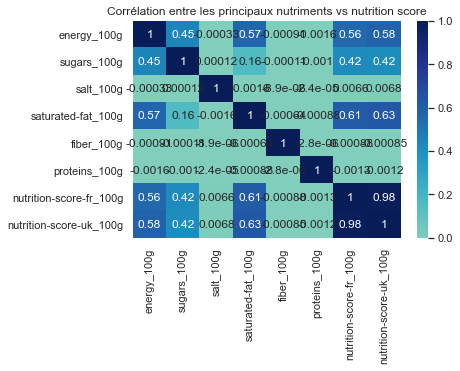

In [135]:
plt.title('Corrélation entre les principaux nutriments vs nutrition score')
sns.heatmap(corr_matric2[qty2].loc[qty2],
        xticklabels=corr_matric2[qty2].loc[qty2].columns,
        yticklabels=corr_matric2[qty2].loc[qty2].columns,cmap="YlGnBu" ,center=0.20, annot=True)